## Time evolution of the categories

- File name: time_evol_cat.ipynb

- Author: Loïc Fischer

- Date created:16/12/2022

- Date last modified: 20/12/2022

- Python Version: 3.9.13

**The purpose of this file is to give an overview of the evolution of the channel categories throught time. We will look at the number of video posted per category
and especially foccus on 2018 and 2019 wher the category "News & Politics" become the largest one in term of number of video.**


In [1]:
## Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import os
import sys
import json
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Reading the data from YouNiverse

In [2]:

PATH                = 'D:/Ada/'
DATA_CHANNEL        = 'df_channels_en.tsv.gz'
DATA_VIDEO_META     = 'yt_metadata_en.jsonl.gz'
DATA_COMMENT        = 'youtube_comments.tsv.gz'
NUM_COMMENT         = 'num_comments.tsv.gz'
COMPRESSION         = 'gzip'
SEPARATOR           = '\t'

df_channels   = pd.DataFrame()
df_video_meta = pd.DataFrame()
df_comments   = pd.DataFrame()

## Read data from memory and clean it
df_channels = pd.read_csv(os.path.join(PATH,DATA_CHANNEL), compression=COMPRESSION,sep=SEPARATOR)
df_channels = df_channels.dropna()

## Read data from memory and clean it only a part is imported du to memory issues
## The whole data imported later using chunks
df_video_meta = pd.read_json(os.path.join(PATH,DATA_VIDEO_META), compression=COMPRESSION,lines=True, nrows=10000)
df_video_meta = df_video_meta.dropna()

## Read data from memory and clean it only a part is imported du to memory issues
## The whole data imported later using chunks
df_comments = pd.read_csv(os.path.join(PATH,DATA_COMMENT),sep=SEPARATOR,nrows=1e6)
df_comments = df_comments.dropna()

## Display head of DataFrame

df_channels.head(2)
df_video_meta.head(2)
df_comments.head(2)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.270363,Lego City Police Lego Firetruck Cartoons about...,1.0,SBqSc91Hn9g,1159,8.0,"lego city,lego police,lego city police,lego ci...",Lego City Police Lego Firetruck Cartoons about...,2016-09-28 00:00:00,1057
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.914516,Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...,1.0,UuugEl86ESY,2681,23.0,"Lego superheroes,lego hulk,hulk smash,lego mar...",Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...,2016-09-28 00:00:00,12894


,author,video_id,likes,replies
0,1,Gkb1QMHrGvA,2,0
1,1,CNtp0xqoods,0,0


In [3]:
## Creating a empty dataset

channels_cat=list(df_channels.category_cc.unique())

## Renaming the caterogy to fit the category in video metadata
channels_cat.remove('Film and Animation')
channels_cat.append('Film & Animation')

## Setting years
years=list(range(2005,2020))

## Creating an empty data in the wanted shape
cross_tab=pd.DataFrame(np.zeros((len(years),len(channels_cat))),years,channels_cat)
cross_tab

,Gaming,Education,Entertainment,Howto & Style,Sports,Music,Comedy,Nonprofits & Activism,People & Blogs,News & Politics,Science & Technology,Pets & Animals,Autos & Vehicles,Travel & Events,Film & Animation
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
## iterating over the  video metadata
## Commented because of the time to run: aroud 40 minutes
'''
## Initialize i
i=0

## Import the empty dataframe
cross_tab_it=cross_tab

## Create chunks to read the data
chunks = pd.read_json(os.path.join(PATH,DATA_VIDEO_META),compression=COMPRESSION, lines=True, chunksize = 1e5)

## loop on chung to read the data and create a crosstab
for chunk in chunks:

    ## Getting values from the previous loop
    cross_tab_old=cross_tab_it

    ## droping useless data
    chunk=chunk.drop(['channel_id','crawl_date','description','dislike_count','duration','title','like_count','tags'],axis=1)

    ##Changing type to datetime
    chunk['upload_date']=pd.to_datetime(chunk['upload_date'])

    ## Creating crosstab
    cross_tab_new=pd.crosstab(chunk.upload_date.dt.year,chunk.categories)
    a=chunk.groupby(by=[chunk.upload_date.dt.year,chunk.categories])
    a.size()
    cross_tab_new
    cross_tab_it=cross_tab_old.add(cross_tab_new,fill_value=0)

    ## Print i to have the progress report
    i=i+1
    print(i)

    ## break for the trials
    if i >9 :
        break

print(view_count)

display(cross_tab_it)

## Saving to csv
#cross_tab_it.to_csv(csv_outputs/cat_evolution.csv)
'''

"\n## Initialize i\ni=0\n\n## Import the empty dataframe\ncross_tab_it=cross_tab\n\n## Create chunks to read the data\nchunks = pd.read_json(os.path.join(PATH,DATA_VIDEO_META),compression=COMPRESSION, lines=True, chunksize = 1e5)\n\n## loop on chung to read the data and create a crosstab\nfor chunk in chunks:\n\n    ## Getting values from the previous loop\n    cross_tab_old=cross_tab_it\n\n    ## droping useless data\n    chunk=chunk.drop(['channel_id','crawl_date','description','dislike_count','duration','title','like_count','tags'],axis=1)\n\n    ##Changing type to datetime\n    chunk['upload_date']=pd.to_datetime(chunk['upload_date'])\n\n    ## Creating crosstab\n    cross_tab_new=pd.crosstab(chunk.upload_date.dt.year,chunk.categories)\n    a=chunk.groupby(by=[chunk.upload_date.dt.year,chunk.categories])\n    a.size()\n    cross_tab_new\n    cross_tab_it=cross_tab_old.add(cross_tab_new,fill_value=0)\n\n    ## Print i to have the progress report\n    i=i+1\n    print(i)\n\n    ## br

In [5]:
#importing and filtering data from csv

## Initilize of dataframe
evolution=pd.DataFrame

## Read the data from the previous cell
evolution=pd.read_csv('csv_outputs/evolution.csv',index_col=0)

## Fill NaN with 0
evolution=evolution.fillna(0)

#Sorting on values from 2018
evolution=evolution.sort_values(by = 2018, axis = 1,ascending = False)

## Drop 2019 since the year is not complete
evolution=evolution.drop(2019,axis=0)

## Display DataFrame
evolution

,Entertainment,Gaming,News & Politics,People & Blogs,Music,Sports,Education,Howto & Style,Science & Technology,Film & Animation,Autos & Vehicles,Comedy,Travel & Events,Pets & Animals,Nonprofits & Activism,Other,Shows,Movies
2005,63.0,0.0,7.0,0.0,10.0,3.0,7.0,20.0,3.0,9.0,3.0,29.0,123.0,55.0,0.0,0.0,0.0,0.0
2006,6570.0,301.0,1317.0,1319.0,4675.0,1931.0,169.0,1194.0,90.0,1025.0,1421.0,1813.0,829.0,603.0,37.0,0.0,0.0,0.0
2007,29878.0,4069.0,14360.0,13672.0,22956.0,11443.0,2314.0,8925.0,3083.0,3795.0,7366.0,5694.0,4979.0,4173.0,541.0,2.0,0.0,0.0
2008,55638.0,25312.0,25270.0,31167.0,51183.0,23328.0,22799.0,26063.0,17317.0,7751.0,18476.0,9555.0,11130.0,6921.0,6123.0,7.0,0.0,0.0
2009,91212.0,86693.0,67463.0,60399.0,116200.0,45629.0,41520.0,42771.0,32539.0,14809.0,35480.0,14795.0,21174.0,10295.0,13577.0,30.0,0.0,0.0
2010,153734.0,141462.0,97464.0,66036.0,174585.0,82347.0,74632.0,67351.0,52310.0,28327.0,59593.0,18945.0,31476.0,15596.0,21495.0,71.0,0.0,0.0
2011,304094.0,290048.0,169560.0,97349.0,285111.0,137547.0,120596.0,108199.0,83395.0,62429.0,88574.0,32902.0,45701.0,21037.0,28280.0,162.0,0.0,0.0
2012,497732.0,509309.0,246839.0,156526.0,404498.0,219892.0,169777.0,180681.0,125864.0,91988.0,135684.0,50393.0,67591.0,30398.0,39107.0,118.0,39.0,0.0
2013,634714.0,833420.0,349808.0,221188.0,521508.0,287302.0,216381.0,246132.0,168943.0,125449.0,162838.0,68485.0,83874.0,38922.0,59203.0,108.0,2.0,2.0
2014,807142.0,1146869.0,460032.0,411033.0,653974.0,330836.0,255626.0,293392.0,186324.0,170831.0,186404.0,90952.0,78988.0,37009.0,70375.0,147.0,0.0,1.0


<Figure size 640x480 with 0 Axes>

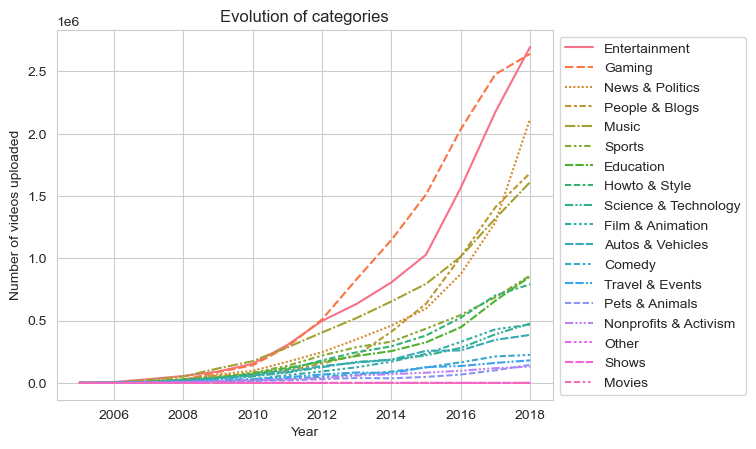

In [6]:
## Static line plot


plt.figure();
sns.set_style("whitegrid")
ax=sns.lineplot(data=evolution)

## Layout
ax=sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
ax=plt.ylabel('Number of videos uploaded');
ax=plt.xlabel('Year');
ax=plt.title('Evolution of categories');


## Saving figure
#ax=plt.savefig('pictures/category_evolution.png',bbox_inches='tight',dpi=150)

## Display it
plt.show()

In [7]:
## Interactive line plot

fig = px.line(evolution,title='Evolution of Youtube categories',
            labels={"index": "Year",
                    "value": "Number of videos uploaded",
                    "variable":"Category"
                    }
            )
fig.show()

## Saving figure:
#fig.write_html("html_figures/overall_categories_evolution.html")

In [8]:
## Iterrating video metadata over a particular year

## This basically the same code as befor but with a limitation on the year

'''
## format: "mm.dd.yyyy"
start_date=pd.to_datetime("01.01.2019")
end_date=pd.to_datetime("10.01.2019")

months=list(range(1,13))
cross_tab_it=pd.DataFrame(np.zeros((len(months),len(channels_cat))),months,channels_cat)

i=0
appended_videos=pd.DataFrame()
chunks = pd.read_json(os.path.join(PATH,DATA_VIDEO_META),compression=COMPRESSION, lines=True, chunksize = 1e5)

for chunk in chunks:
    cross_tab_old=cross_tab_it
    chunk=chunk.drop(['channel_id','description','dislike_count','duration','title','like_count','tags'],axis=1)
    chunk['upload_date']=pd.to_datetime(chunk['upload_date'])
    chunk_filtered=chunk[(chunk['upload_date']>=start_date)&(chunk['upload_date']<end_date)]
    cross_tab_new=pd.crosstab(chunk_filtered.upload_date.dt.month,chunk_filtered.categories)
    cross_tab_it=cross_tab_old.add(cross_tab_new,fill_value=0)
    i+=1
    #if i>20:
    #    break
    print(i)

#cross_tab_it.to_csv('csv_outputs/{}_month_category_evo.csv'.format(start_date.year))

'''

'\n## format: "mm.dd.yyyy"\nstart_date=pd.to_datetime("01.01.2019")\nend_date=pd.to_datetime("10.01.2019")\n\nmonths=list(range(1,13))\ncross_tab_it=pd.DataFrame(np.zeros((len(months),len(channels_cat))),months,channels_cat)\n\ni=0\nappended_videos=pd.DataFrame()\nchunks = pd.read_json(os.path.join(PATH,DATA_VIDEO_META),compression=COMPRESSION, lines=True, chunksize = 1e5)\n\nfor chunk in chunks:\n    cross_tab_old=cross_tab_it\n    chunk=chunk.drop([\'channel_id\',\'description\',\'dislike_count\',\'duration\',\'title\',\'like_count\',\'tags\'],axis=1)\n    chunk[\'upload_date\']=pd.to_datetime(chunk[\'upload_date\'])\n    chunk_filtered=chunk[(chunk[\'upload_date\']>=start_date)&(chunk[\'upload_date\']<end_date)]\n    cross_tab_new=pd.crosstab(chunk_filtered.upload_date.dt.month,chunk_filtered.categories)\n    cross_tab_it=cross_tab_old.add(cross_tab_new,fill_value=0)\n    i+=1\n    #if i>20:\n    #    break\n    print(i)\n\n#cross_tab_it.to_csv(\'csv_outputs/{}_month_category_evo.cs

<Figure size 640x480 with 0 Axes>

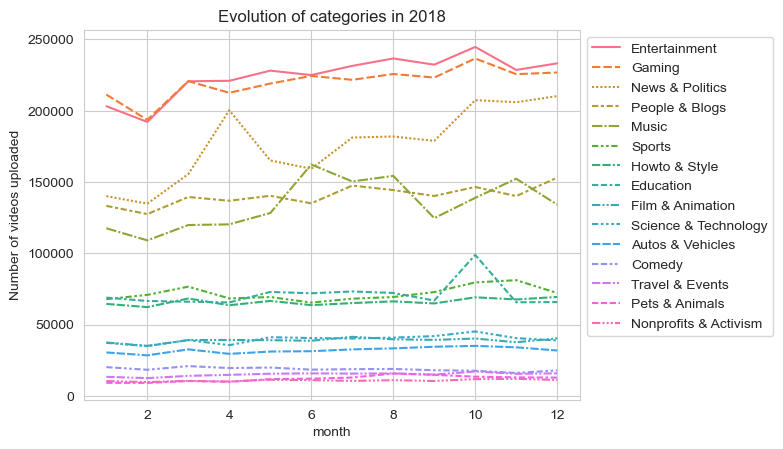

<Figure size 640x480 with 0 Axes>

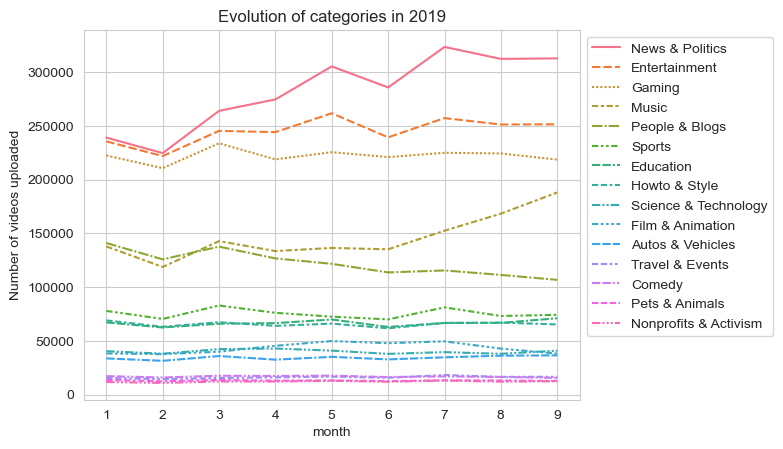

In [9]:
##  Static plot of evolution over 2019
for i in [2018,2019]:
    selected_year=i

    ## Read data and clean it
    cross_tab_it=pd.read_csv('csv_outputs/{}_month_category_evo.csv'.format(selected_year),index_col=0)
    cross_tab_it=cross_tab_it.drop('Unnamed: 1',axis=1)

    evolution_201X=cross_tab_it

    ## Condition on year to have a better display
    if selected_year == 2019:
        evolution_201X=evolution_201X.sort_values(by = 9, axis = 1,ascending = False)
        evolution_201X=evolution_201X.drop([10,11,12],axis=0)
    if selected_year == 2018:
        evolution_201X=evolution_201X.sort_values(by = 12, axis = 1,ascending = False)
    
    ## Creating the plot
    sns.set_style("whitegrid")
    plt.figure();
    ax=sns.lineplot(data=evolution_201X)

    ## Layout
    ax=sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
    ax=plt.ylabel('Number of videos uploaded');
    ax=plt.xlabel('month');
    ax=plt.title('Evolution of categories in {}'.format(i));
    #ax=plt.savefig('pictures/{}_category_evolution.png'.format(selected_year),bbox_inches='tight',dpi=150)

    ## Display
    plt.show()

In [10]:
## Interactive Evolution over 2018 and 2019

for i in [2018,2019]:
    selected_year=i

    ## Read data and clean it
    cross_tab_it=pd.read_csv('csv_outputs/{}_month_category_evo.csv'.format(selected_year),index_col=0)
    cross_tab_it=cross_tab_it.drop('Unnamed: 1',axis=1)
    evolution_201X=cross_tab_it
    
    ## Condition on year to have a better display
    if selected_year == 2019:
        evolution_201X=evolution_201X.drop([10,11,12],axis=0)
        evolution_201X=evolution_201X.sort_values(by = 1, axis = 1,ascending = False)
    
    if selected_year == 2018:
        evolution_201X=evolution_201X.sort_values(by = 12, axis = 1,ascending = False)

    ## Creating the plot
    fig = px.line(evolution_201X,title='Evolution of categories in {}'.format(selected_year),
                labels={"index": "Month",
                        "value": "Number of videos uploaded",
                        "variable":"Category"
                        }
                );

    ## Layout
    fig.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals = [1,2,3,4,5,6,7,8,9,10,11,12],
            ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        ));
    plt.show()

    #Save figure
    #fig.write_html("html_figures/{}_category_evolution.html".format(selected_year));